<a href="https://colab.research.google.com/github/k4keshav-singh/Cat-vs-dog-recognition/blob/main/cats_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhananjaythakur001","key":"bc71203698055d3957e4f5270361eba4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [ ]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
replace dogs_vs_cats/test/cats/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dogs_vs_cats/test/cats/cat.10.jpg  
replace dogs_vs_cats/test/cats/cat.10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace dogs_vs_cats/test/cats/cat.10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'binary', # Changed to 'binary'
    batch_size = 32,
    image_size = (256, 256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'binary', # Changed to 'binary'
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.utils import to_categorical

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  label = to_categorical(label, num_classes=2) # One-hot encode the labels
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, padding = 'valid'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, padding = 'valid'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, padding = 'valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,258 (56.64 MB)

 Trainable params: 14,847,810 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.5612 - loss: 1.5967 - val_accuracy: 0.6026 - val_loss: 0.6627
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 82ms/step - accuracy: 0.6432 - loss: 0.6416 - val_accuracy: 0.6334 - val_loss: 0.6301
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7120 - loss: 0.5632 - val_accuracy: 0.7486 - val_loss: 0.5139
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7763 - loss: 0.4782 - val_accuracy: 0.7822 - val_loss: 0.4532
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 93ms/step - accuracy: 0.8154 - loss: 0.4112 - val_accuracy: 0.7928 - val_loss: 0.4472
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.8524 - loss: 0.3485 - val_accuracy: 0.7824 - val_loss: 0.4932
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.8864 - loss: 0.2742 - val_accuracy: 0.7112 - val_loss: 0.7170
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9206 - loss: 0.2075 -

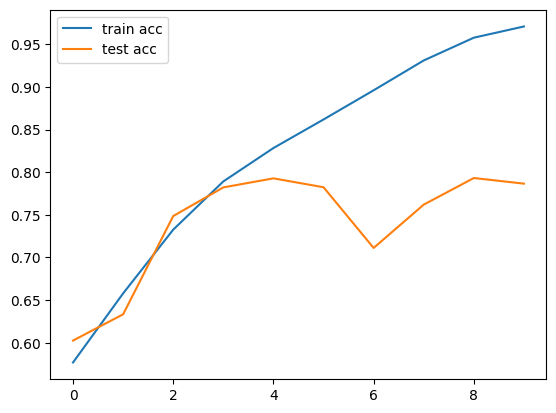

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()

In [ ]:
# Plot Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Extract true labels from the test dataset
y_true = []
for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1)) # Convert to class indices

Y_pred = model.predict(test_ds)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')

# Use y_true instead of test_ds.classes
print(confusion_matrix(y_true, y_pred))

print('Classification Report')
target_names = ['Cats', 'Dogs']
print(classification_report(y_true, y_pred, target_names=target_names))

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step
Confusion Matrix
[[1532  968]
 [1553  947]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.50      0.61      0.55      2500
        Dogs       0.49      0.38      0.43      2500

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.49      5000
weighted avg       0.50      0.50      0.49      5000



In [ ]:
import cv2
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    if predicted_class == 0:
        print("The image is predicted as a cat.")
    else:
        print("The image is predicted as a dog.")

# Replace 'path/to/your/image.jpg' with the actual path to your image
predict_image('/content/dogs_vs_cats/test/cats/cat.10.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The image is predicted as a cat.


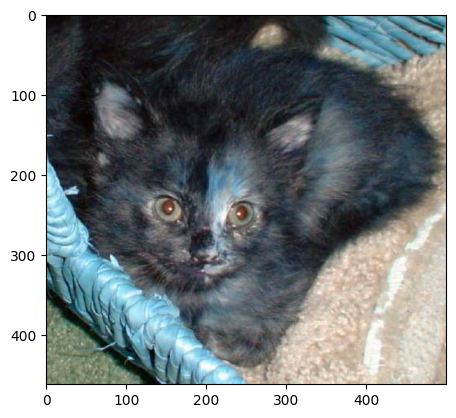

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[1., 0.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10030.jpg')
plt.imshow(test_img)
plt.show()
test_img.shape
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

In [ ]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)  # Load image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (256, 256))  # Resize to match model input
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image
def predict_image(image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image)[0][0]  # Get prediction score
    label = "Cat" if prediction > 0.5 else "Dog"
    confidence = max(prediction, 1 - prediction) * 100  # Convert to percentage
    print(f"Prediction: {label} (Confidence: {confidence:.2f}%)")
image_path = "/content/dogs_vs_cats/test/cats/cat.10030.jpg"  # Replace with your image path
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Prediction: Cat (Confidence: 100.00%)
